In [2]:
import torch

import torchaudio
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [3]:

path = os.path.join("..", "..", "data", "MagnaTagATune", "samples", "train", "0", "american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-117-146.npy")

In [73]:
data = np.load(path)
waveform = torch.from_numpy(data)

if waveform.ndim == 1:
    waveform = waveform.unsqueeze(0)

spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=12000, n_fft=512, hop_length=256, n_mels=96)(waveform)

add_pad = torch.nn.ConstantPad1d(padding=37, value=0)
pad_spectrogram = add_pad(spectrogram)

transform = torchaudio.transforms.AmplitudeToDB(stype="amplitude", top_db=80)
spectrogram_db = transform(pad_spectrogram)

print(spectrogram_db.shape)

np.save("spectrogram.npy", spectrogram)

torch.Size([1, 96, 1440])


In [71]:
max_value = np.max(spectrogram_db.numpy())
min_value = np.min(spectrogram_db.numpy())
print("max value in spectrogram: ", max_value)
print("min value in spectrogram: ", min_value)

max value in spectrogram:  230.38123
min value in spectrogram:  110.381226


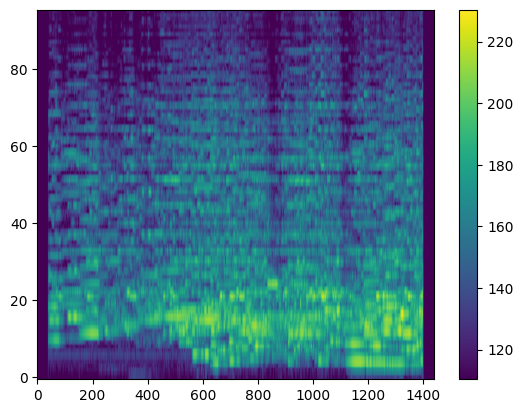

In [72]:
# Plot and save the mel spectrogram
plt.figure()
plt.imshow(spectrogram_db[0], cmap="viridis", aspect='auto', origin='lower')
plt.colorbar()

# Save the spectrogram to an image file
# plt.savefig('mel_spectrogram.png')

# Display the plot
plt.show()